In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\ml_data\sales_forecasting.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df=df.drop('Row ID',axis=1)

In [5]:
df.shape

(9800, 17)

In [6]:
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9789 non-null   object 
 1   Order Date     9789 non-null   object 
 2   Ship Date      9789 non-null   object 
 3   Ship Mode      9789 non-null   object 
 4   Customer ID    9789 non-null   object 
 5   Customer Name  9789 non-null   object 
 6   Segment        9789 non-null   object 
 7   Country        9789 non-null   object 
 8   City           9789 non-null   object 
 9   State          9789 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9789 non-null   object 
 12  Product ID     9789 non-null   object 
 13  Category       9789 non-null   object 
 14  Sub-Category   9789 non-null   object 
 15  Product Name   9789 non-null   object 
 16  Sales          9789 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [10]:
df['Postal Code']=df['Postal Code'].astype('int')

In [11]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
df['Ship Mode'].value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

<Axes: >

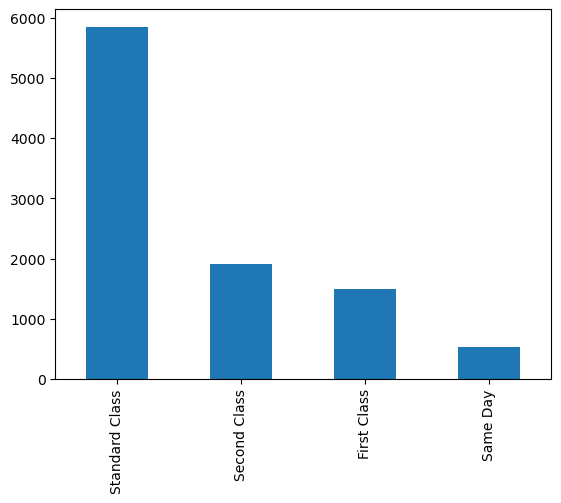

In [14]:
df['Ship Mode'].value_counts().plot(kind='bar')

In [15]:
df.groupby(['Ship Mode'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Ship Mode,Sales
3,Standard Class,1.332617e+06
2,Second Class,4.491990e+05
0,First Class,3.455723e+05
1,Same Day,1.252190e+05


<Axes: xlabel='Ship Mode', ylabel='Sales'>

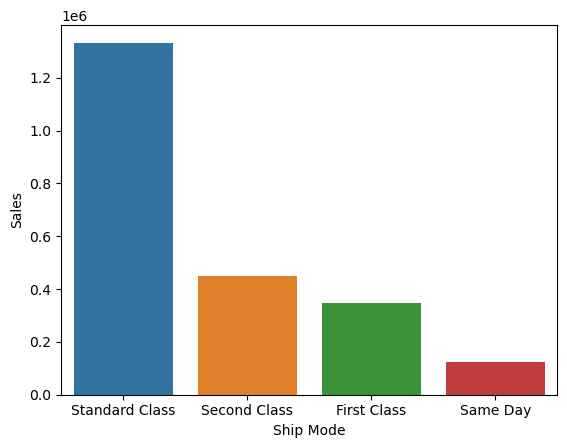

In [16]:
shipmode_sales=df.groupby(['Ship Mode'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='Ship Mode',y='Sales',data=shipmode_sales)

In [17]:
# most of the shipping are done in standard class.... this might be because in standard the shipping price may be affordable also after standard class there is second class got second rank..and as we know the second class has affordable prices

In [18]:
df['Customer Name'].nunique()

793

In [19]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [20]:
df['Segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

In [21]:
df.groupby(['Segment'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Segment,Sales
0,Consumer,1.146708e+06
1,Corporate,6.822118e+05
2,Home Office,4.236874e+05


<Axes: xlabel='Segment', ylabel='Sales'>

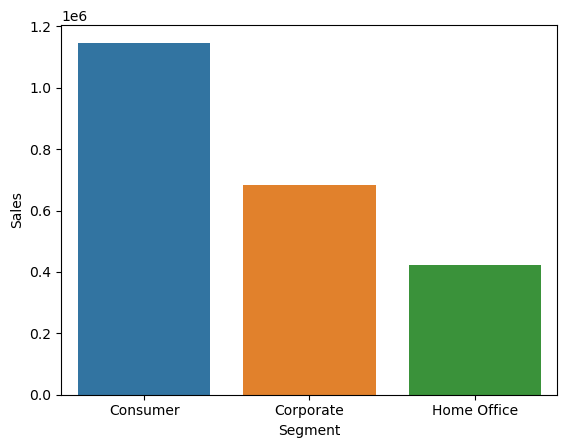

In [22]:
segment_sales=df.groupby(['Segment'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sns.barplot(x='Segment',y='Sales',data=segment_sales)

In [23]:
# Consumer segment are having more sales than corporate and home offices segments

In [24]:
df['City'].value_counts().head(10)

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: City, dtype: int64

In [25]:
df.groupby('City',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


<Axes: xlabel='City', ylabel='Sales'>

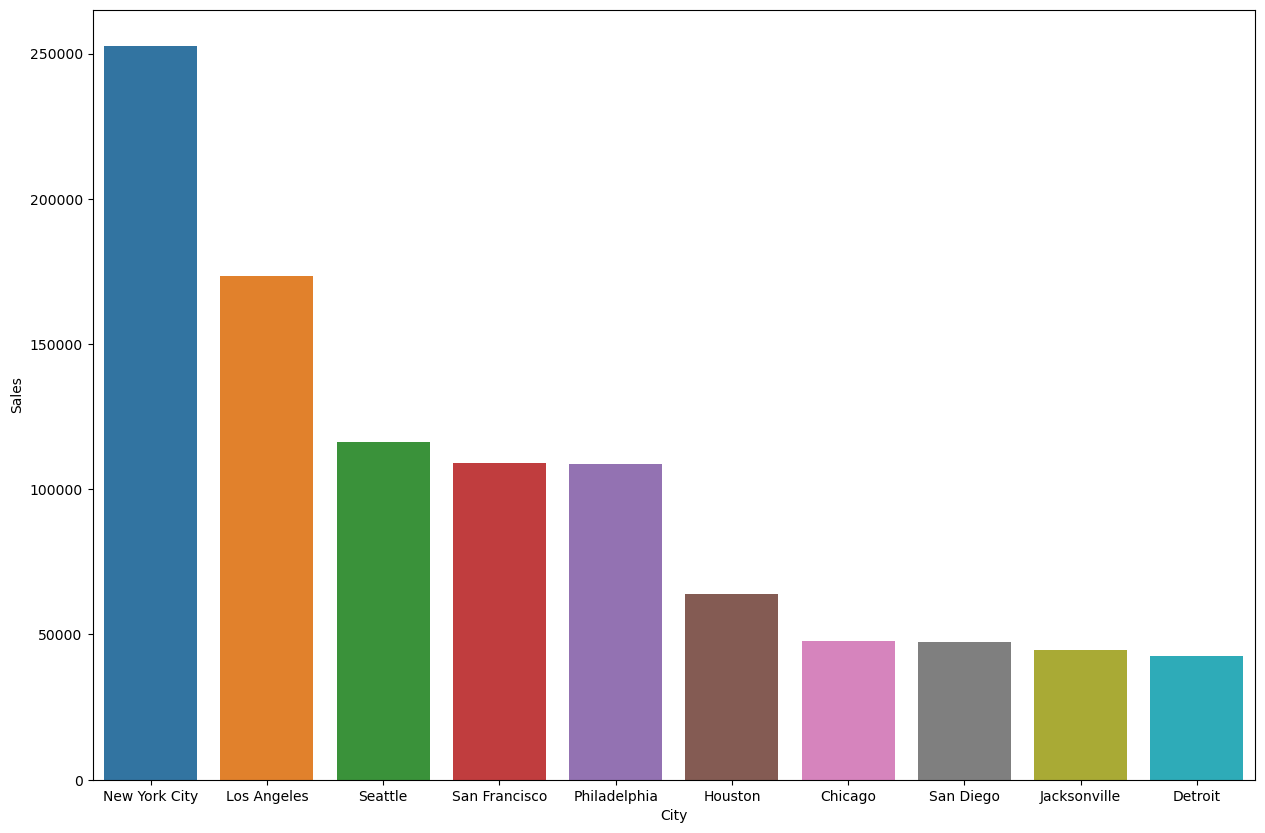

In [26]:
city_sales=df.groupby('City',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='City',y='Sales',data=city_sales)

In [27]:
df[df['Sales']==22638.48]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2697,CA-2015-145317,18/03/2015,23/03/2015,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48


In [29]:
##These are the top 10 cities where the value of sales more

In [30]:
# Is there repeated customers??
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<Axes: xlabel='Customer ID,Customer Name'>

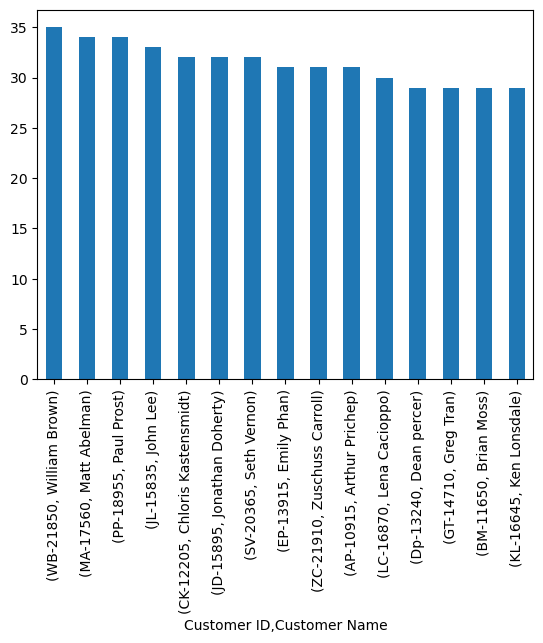

In [31]:
df[['Customer ID','Customer Name']].value_counts().head(15).plot(kind='bar')

In [32]:
# Yes! there are repeating customers

In [33]:
# Ranking of customers with highest sales
df.groupby(['Customer Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


In [34]:
# This are the top 10 customers who have done more sales

In [37]:
df.groupby(['City','Postal Code'],as_index=False)['Sales'].sum().sort_values(by="Sales",ascending=False).head(10)

,City,Postal Code,Sales
394,New York City,10024,78534.044
395,New York City,10035,75151.829
392,New York City,10009,53225.076
525,San Francisco,94122,49114.375
393,New York City,10011,45551.598
540,Seattle,98105,41838.008
541,Seattle,98115,41160.908
446,Philadelphia,19134,39390.293
260,Jacksonville,32216,39133.328
323,Los Angeles,90049,37889.924


<Axes: xlabel='City', ylabel='Sales'>

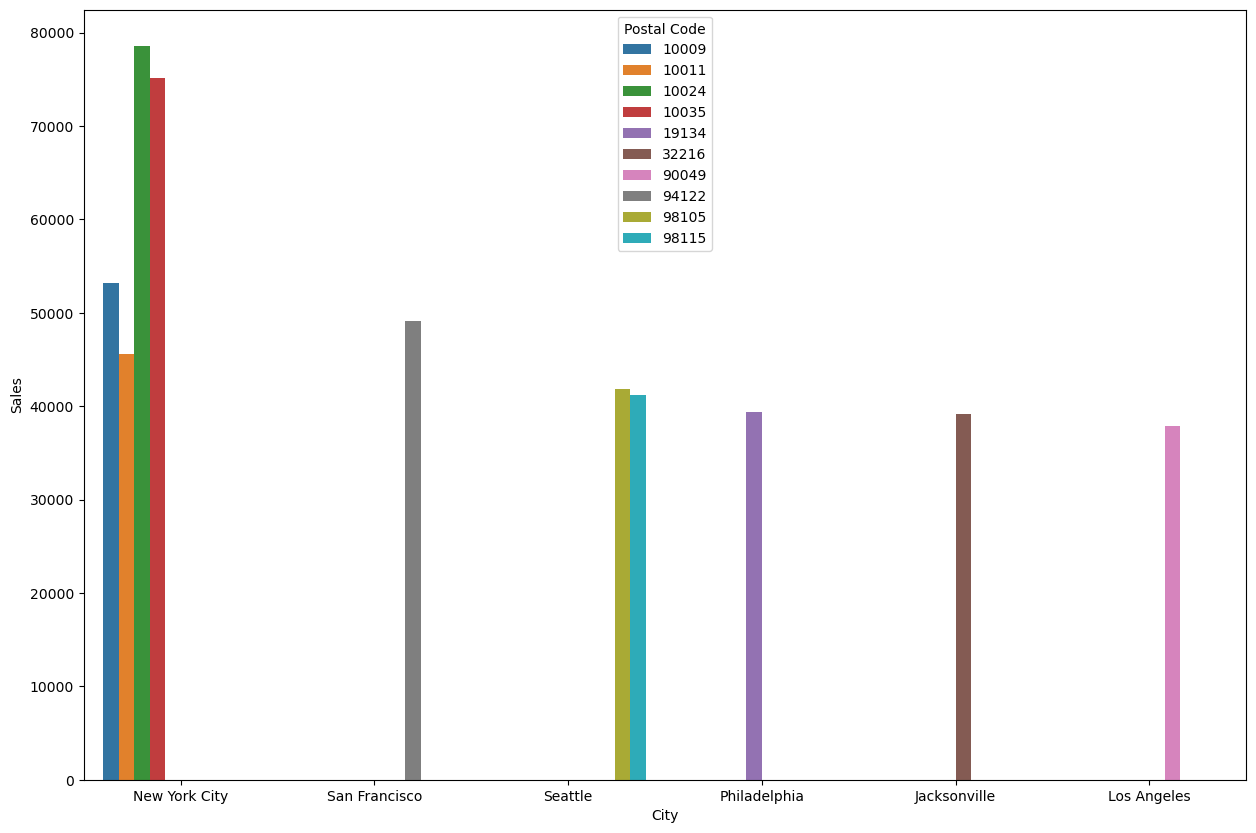

In [38]:
city_postal=df.groupby(['City','Postal Code'],as_index=False)['Sales'].sum().sort_values(by="Sales",ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='City',y='Sales',hue='Postal Code',data=city_postal)

In [39]:
# State wise custmors
cutomer_state=df.groupby(['State'],as_index=False)['Customer Name'].count().sort_values(by='Customer Name',ascending=False).head(10)
cutomer_state

,State,Customer Name
3,California,1946
30,New York,1097
41,Texas,973
36,Pennsylvania,582
44,Washington,504
11,Illinois,483
33,Ohio,454
8,Florida,373
20,Michigan,253
31,North Carolina,247


In [40]:
# most of the customers are from the above mention  state

In [41]:
df.groupby(['State'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
44,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
43,Virginia,70636.7200


In [42]:
# Most of the sales are done from above mention states

In [43]:
region_sales=df.groupby(['Region'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
region_sales

,Region,Sales
3,West,710219.6845
1,East,660589.3560
0,Central,492646.9132
2,South,389151.4590


In [44]:
region_sales['Sales']

3    710219.6845
1    660589.3560
0    492646.9132
2    389151.4590
Name: Sales, dtype: float64

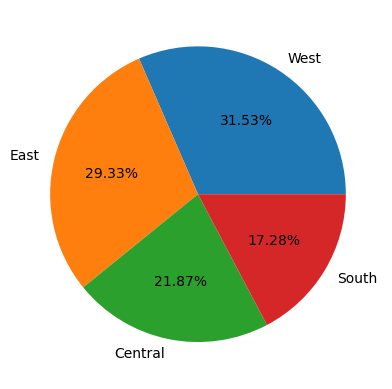

In [45]:
plt.pie(region_sales['Sales'],labels=region_sales['Region'],autopct='%1.2f%%')
plt.show()

In [46]:
# Most of the sales are from the west and east region

In [47]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [48]:
category_sales=df.groupby(['Category'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
category_sales

,Category,Sales
2,Technology,825856.1130
0,Furniture,723538.4757
1,Office Supplies,703212.8240


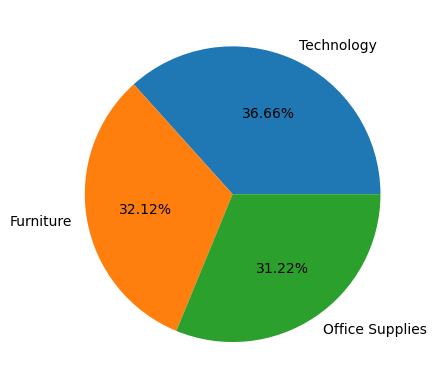

In [49]:
plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.2f%%')
plt.show()

In [50]:
subcategory_sales=df.groupby(['Sub-Category'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
subcategory_sales

,Sub-Category,Sales
13,Phones,326487.6980
5,Chairs,322107.5310
14,Storage,217779.1020
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,163881.6900
6,Copiers,146248.0940
4,Bookcases,109408.2987
1,Appliances,104075.4630


<Axes: xlabel='Sub-Category', ylabel='Sales'>

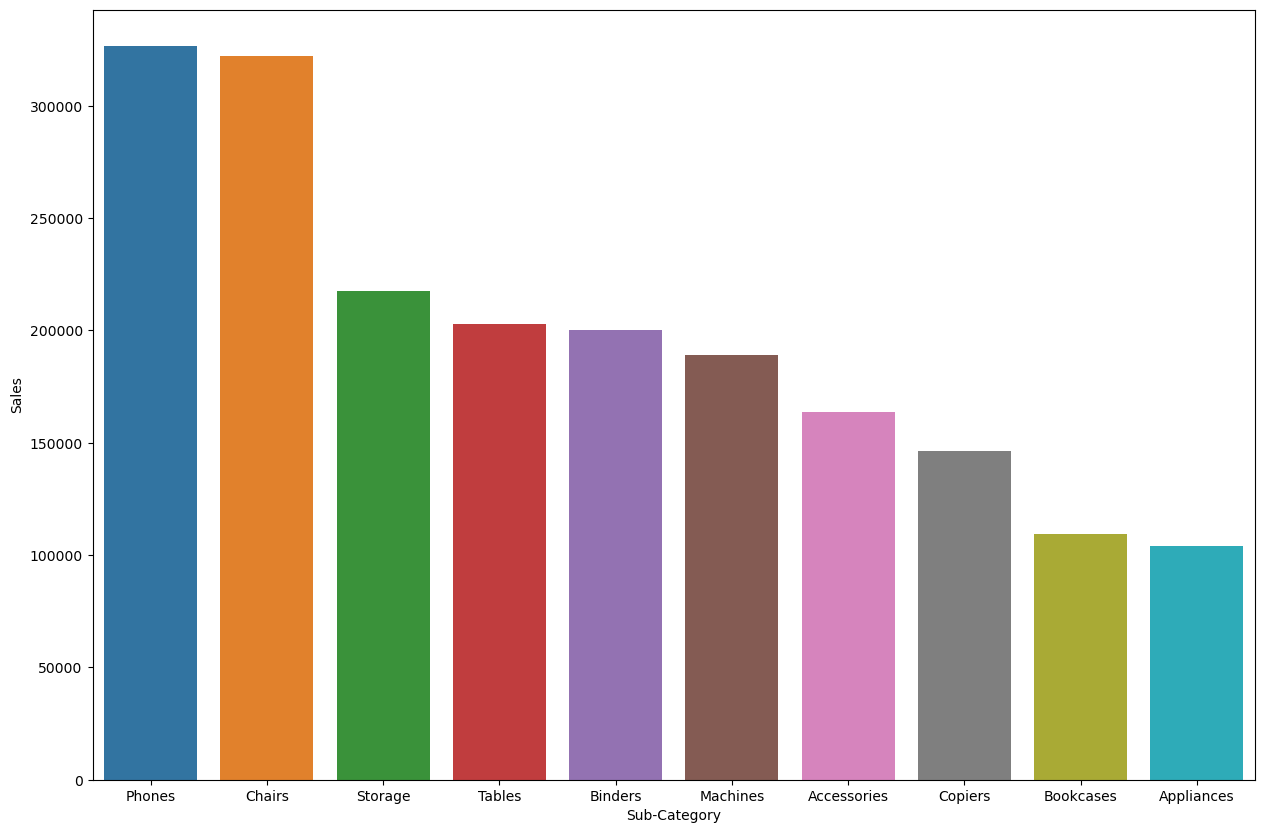

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(x='Sub-Category',y='Sales',data=subcategory_sales)

In [52]:
# The sales of phones,chairs storage and tables are more 

In [53]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

In [54]:
df.groupby(['Product Name'],as_index=False)['Customer Name'].count().sort_values(by='Customer Name',ascending=False).head(10)

,Product Name,Customer Name
1491,Staple envelope,47
1497,Staples,46
536,Easy-staple paper,44
258,Avery Non-Stick Binders,20
1494,Staple remover,18
1498,Staples in misc. colors,18
1509,Storex Dura Pro Binders,17
940,KI Adjustable-Height Table,17
1495,Staple-based wall hangings,16
991,Logitech 910-002974 M325 Wireless Mouse for We...,15


In [55]:
# Staple envelope,Staples and Easy-staple paper this products having more number of customers


In [56]:
df.groupby(['Product Name'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)

,Product Name,Sales
403,Canon imageCLASS 2200 Advanced Copier,61599.824
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
443,Cisco TelePresence System EX90 Videoconferenci...,22638.480
784,HON 5400 Series Task Chairs for Big and Tall,21870.576
684,GBC DocuBind TL300 Electric Binding System,19823.479
686,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
803,Hewlett Packard LaserJet 3310 Copier,18839.686
785,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
681,GBC DocuBind P400 Electric Binding System,17965.068
811,High Speed Automatic Electric Letter Opener,17030.312
